In [178]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tqdm

In [3]:
url_dataset = pd.read_parquet('../data/dataset.parquet')

In [4]:
url_dataset.head()

url  \
0  1stwebdesigner.com/free-wordpress-portfolio-pl...   
1  3boysandadog.com/14-fun-pig-craft-projects-for...   
2                      975kgkl.com/listen-live/popup   
3  9news.com/article/entertainment/music/colorado...   
4  9to5toys.com/2022/04/07/best-ios-app-deals-dea...   

                                                 vec  \
0  [0.06221233308315277, -0.027142951264977455, 0...   
1  [0.053764428943395615, 0.10884478688240051, 0....   
2  [-0.43707162141799927, 0.1012381836771965, 0.4...   
3  [-0.011343298479914665, -0.29037919640541077, ...   
4  [-0.07137802243232727, 0.02366500347852707, 0....   

                                            contents  
0  Top 10 Free WordPress Portfolio Plugins - 1stW...  
1  26 Fun & Easy Pig Craft Projects for Kids. Whe...  
2  KGKL 97.5 FM Country - Listen Live. Listen liv...  
3  Backstreet Boys will bring DNA World Tour back...  
4  Todays best Mac and iOS app deals: Dead Cells,...

In [5]:
pca = PCA(n_components=5)

In [103]:
vec_column = url_dataset['vec']
text_column = url_dataset['contents']
url_column = url_dataset['url']

In [13]:
vec_column.shape, vec_column[0].shape, type(vec_column), type(vec_column[0])

((20362,), (768,), pandas.core.series.Series, numpy.ndarray)

In [14]:
embedding_vec = np.array([vec for vec in vec_column])

In [17]:
embedding_vec[:3]

array([[ 0.06221233, -0.02714295,  0.47383079, ..., -0.14365606,
         0.05328412,  0.04703832],
       [ 0.05376443,  0.10884479,  0.45588806, ..., -0.04734537,
         0.23305787,  0.02620764],
       [-0.43707162,  0.10123818,  0.44792134, ...,  0.17823602,
         0.38031703, -0.51574403]])

In [20]:
# Might not need to scale since embedding's dimensions are not features 
scaler = StandardScaler()
scaled_embedding_vec = scaler.fit_transform(embedding_vec)

In [30]:
reduced_dim = 2
pca = PCA(n_components=reduced_dim)
reduced_embedding_vec = pca.fit_transform(scaled_embedding_vec)

In [31]:
reduced_embedding_vec[:5]

array([[12.52309842,  7.45054134],
       [-0.58880169,  7.61352035],
       [ 8.71788601,  1.89408768],
       [ 3.13048518, -5.79364725],
       [ 4.0713415 ,  1.93806287]])

In [173]:
x = reduced_embedding_vec[:, 0]
y = reduced_embedding_vec[:, 1]

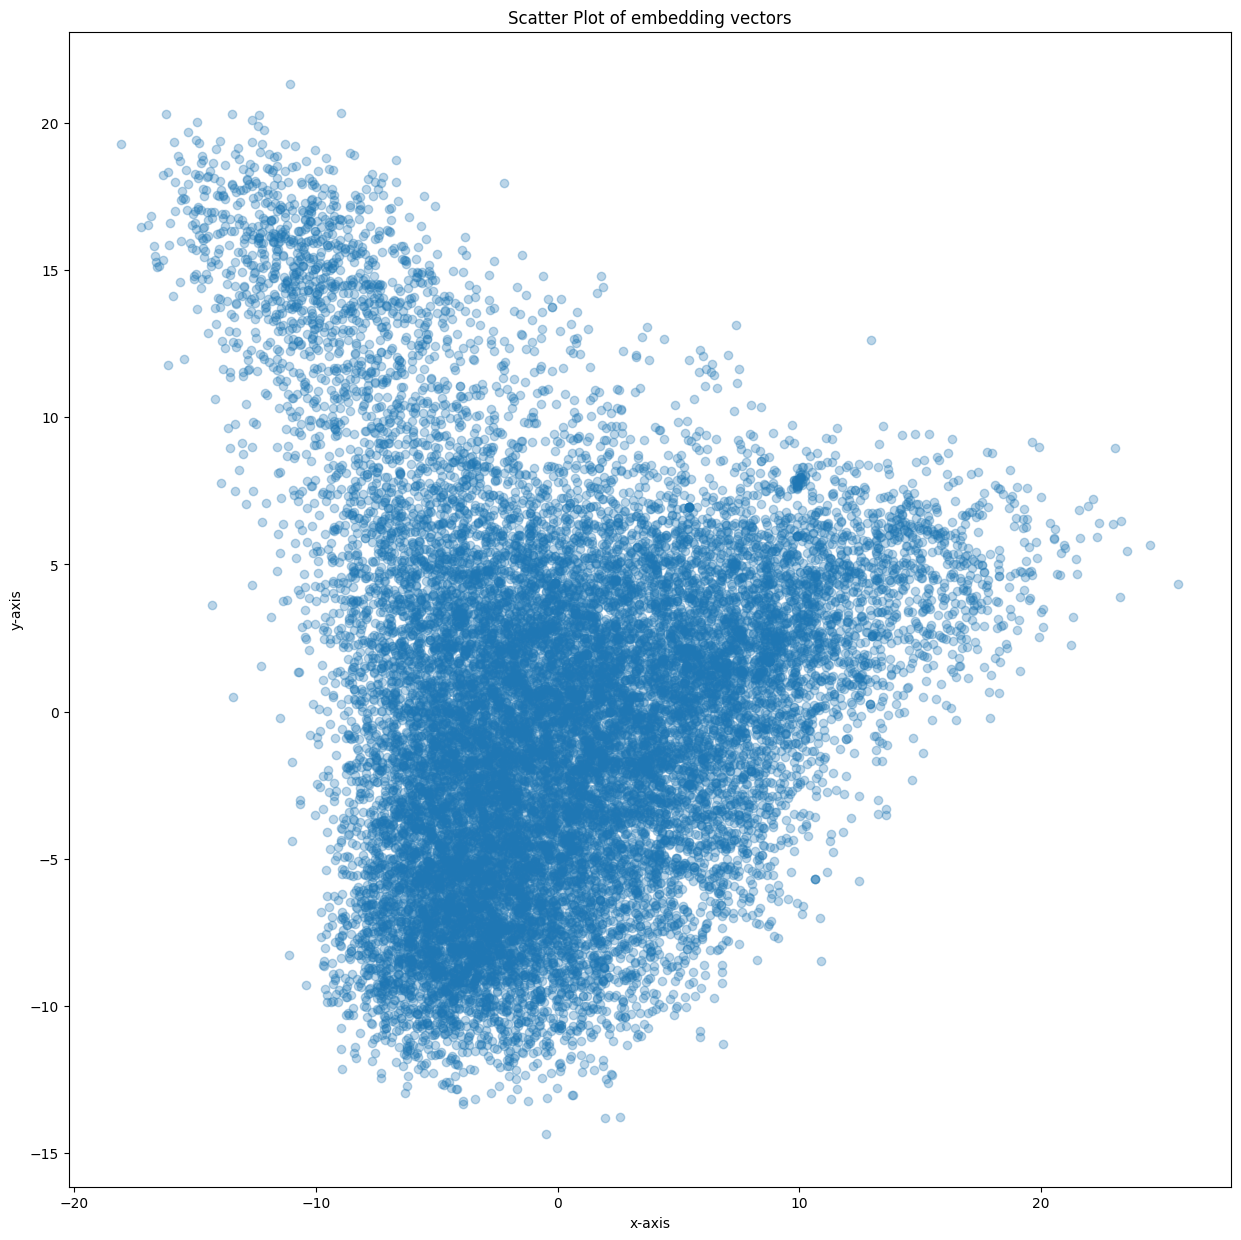

In [172]:
plt.figure(figsize=(15, 15))
plt.scatter(x, y, alpha=0.3)  
plt.title('Scatter Plot of embedding vectors')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

### Extract keywords from the text content 

In [123]:
import spacy
from keyword_spacy import KeywordExtractor
nlp = spacy.load("en_core_web_sm")

In [143]:
nlp.remove_pipe("keyword_extractor")
nlp.add_pipe("keyword_extractor", last=True, config={"top_n": 3, "min_ngram": 2, "max_ngram": 3, "strict": True, "top_n_sent": 3})

In [146]:
text = url_dataset['contents'][0]

In [151]:
# text = "Natural language processing is a fascinating domain of artificial intelligence. It allows computers to understand and generate human language."
for i in range(10,20):
    text = url_dataset['contents'][i]
    doc = nlp(text)
    print("Top Document Keywords:", doc._.keywords[0])
# for sent in doc.sents:
#     print(f"Sentence: {sent.text}")
#     print("Top Sentence Keywords:", sent._.sent_keywords)

Top Document Keywords: ('Lucky Lottery Picks', 1, 0.687926)
Top Document Keywords: ('LVN Students', 1, 0.64976716)
Top Document Keywords: ('Air Fryer Corn', 1, 0.89925843)
Top Document Keywords: ('Teriyaki Chicken Stir', 1, 0.84224725)
Top Document Keywords: ('Old Farmers Almanac', 2, 0.62982917)
Top Document Keywords: ('Maryland seeks solutions', 1, 0.6559203)
Top Document Keywords: ('Maryland rare D', 1, 0.76320636)
Top Document Keywords: ('Flower Delivery Bishopstown', 2, 0.66137964)
Top Document Keywords: ('Cancer Woman', 2, 0.64630044)
Top Document Keywords: ('Dana Parks', 1, 0.56120896)


### Based on the 2-D plot, analyze number of clusters in the plot

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [203]:
clusters_range = range(2, 20)
X = np.array(reduced_embedding_vec)

In [204]:
for n_clusters in clusters_range:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}", f"The average silhouette_score is: {silhouette_avg}")

For n_clusters = 2 The average silhouette_score is: 0.34114787464159535
For n_clusters = 3 The average silhouette_score is: 0.43159596499629077
For n_clusters = 4 The average silhouette_score is: 0.39309134243723787
For n_clusters = 5 The average silhouette_score is: 0.3831324873897672
For n_clusters = 6 The average silhouette_score is: 0.36901448986105073
For n_clusters = 7 The average silhouette_score is: 0.3515695408754401
For n_clusters = 8 The average silhouette_score is: 0.35066754419010265
For n_clusters = 9 The average silhouette_score is: 0.352222149400843
For n_clusters = 10 The average silhouette_score is: 0.3334806584746917
For n_clusters = 11 The average silhouette_score is: 0.33419737882675116
For n_clusters = 12 The average silhouette_score is: 0.3347135685173142
For n_clusters = 13 The average silhouette_score is: 0.3182892836522288
For n_clusters = 14 The average silhouette_score is: 0.31989113949221665
For n_clusters = 15 The average silhouette_score is: 0.32642901987

In [205]:
clusters_range = range(2, 8)

For n_clusters = 2 The average silhouette_score is: 0.34114787464159535
For n_clusters = 3 The average silhouette_score is: 0.43159596499629077
For n_clusters = 4 The average silhouette_score is: 0.39309134243723787
For n_clusters = 5 The average silhouette_score is: 0.3831324873897672
For n_clusters = 6 The average silhouette_score is: 0.36901448986105073
For n_clusters = 7 The average silhouette_score is: 0.3515695408754401


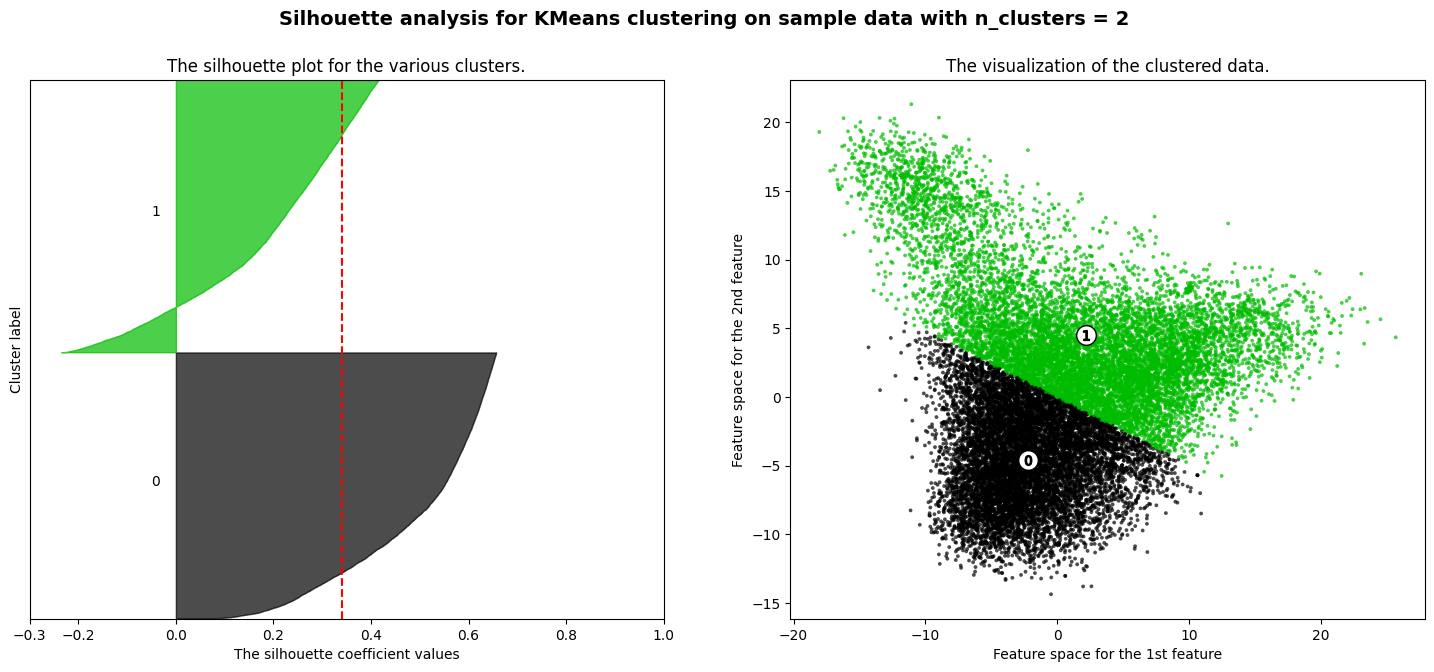

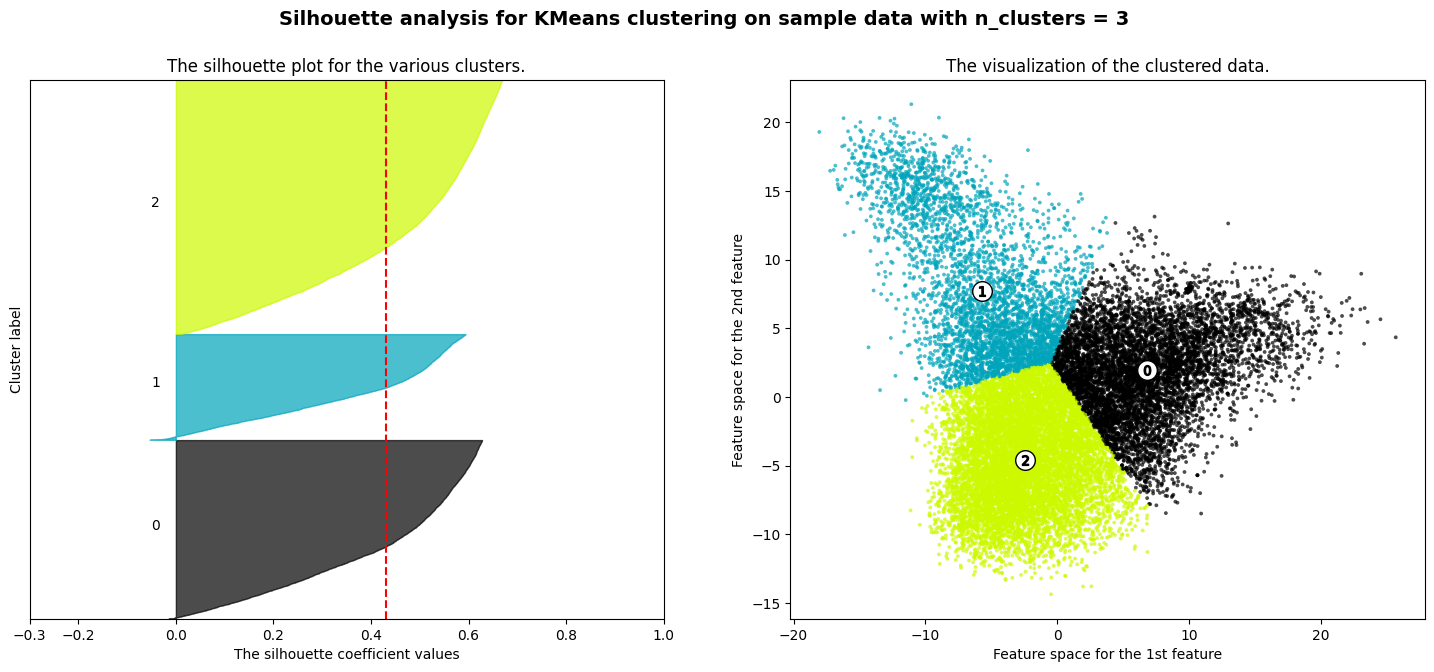

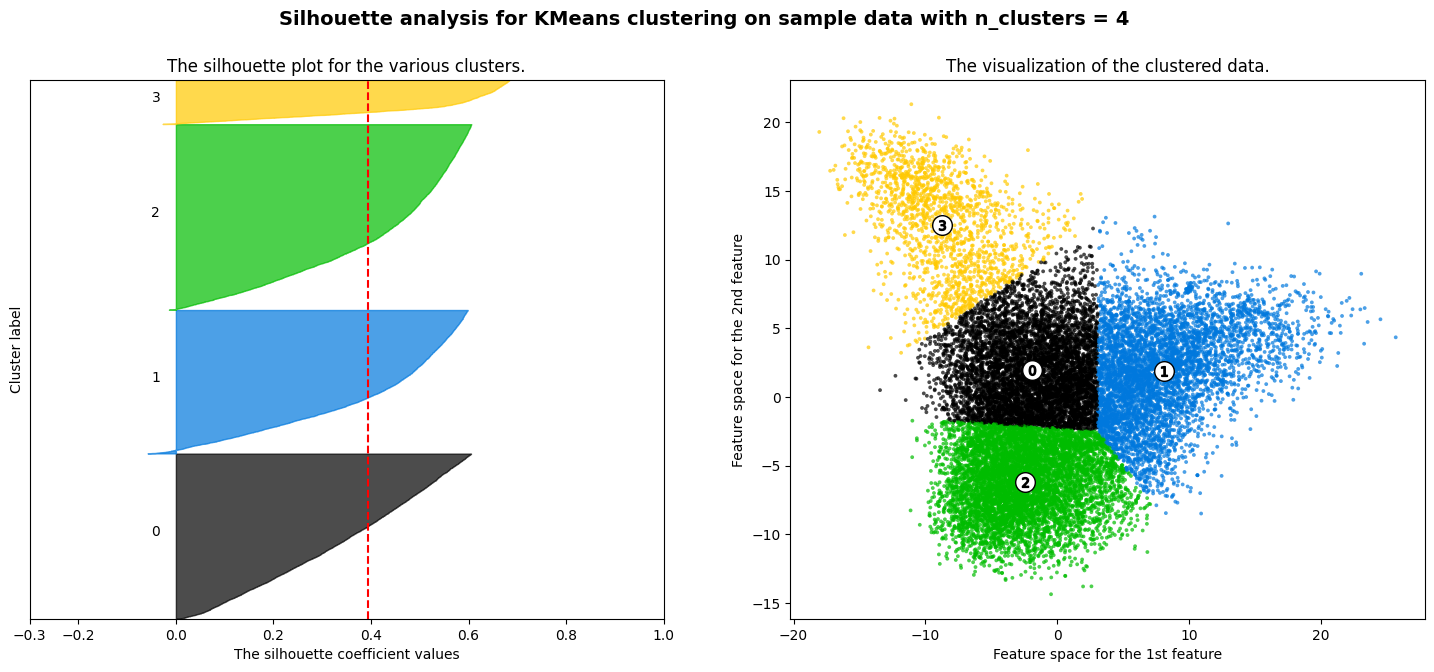

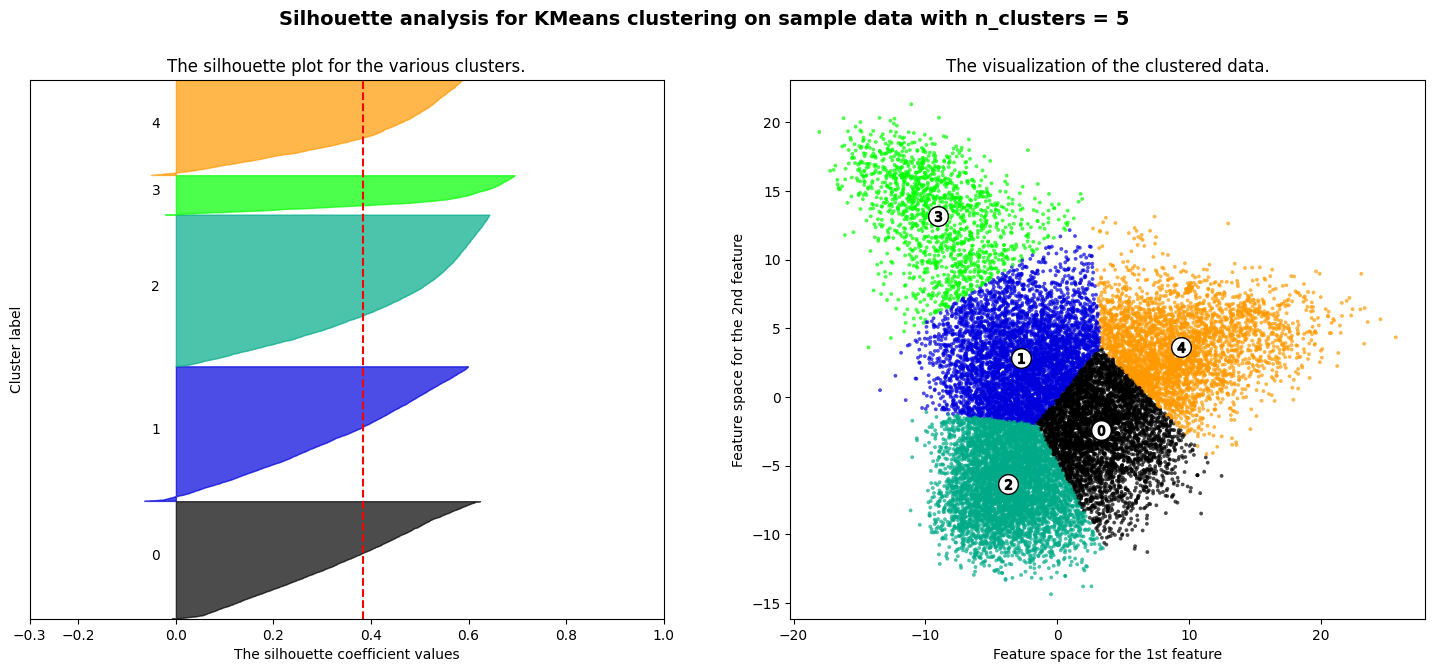

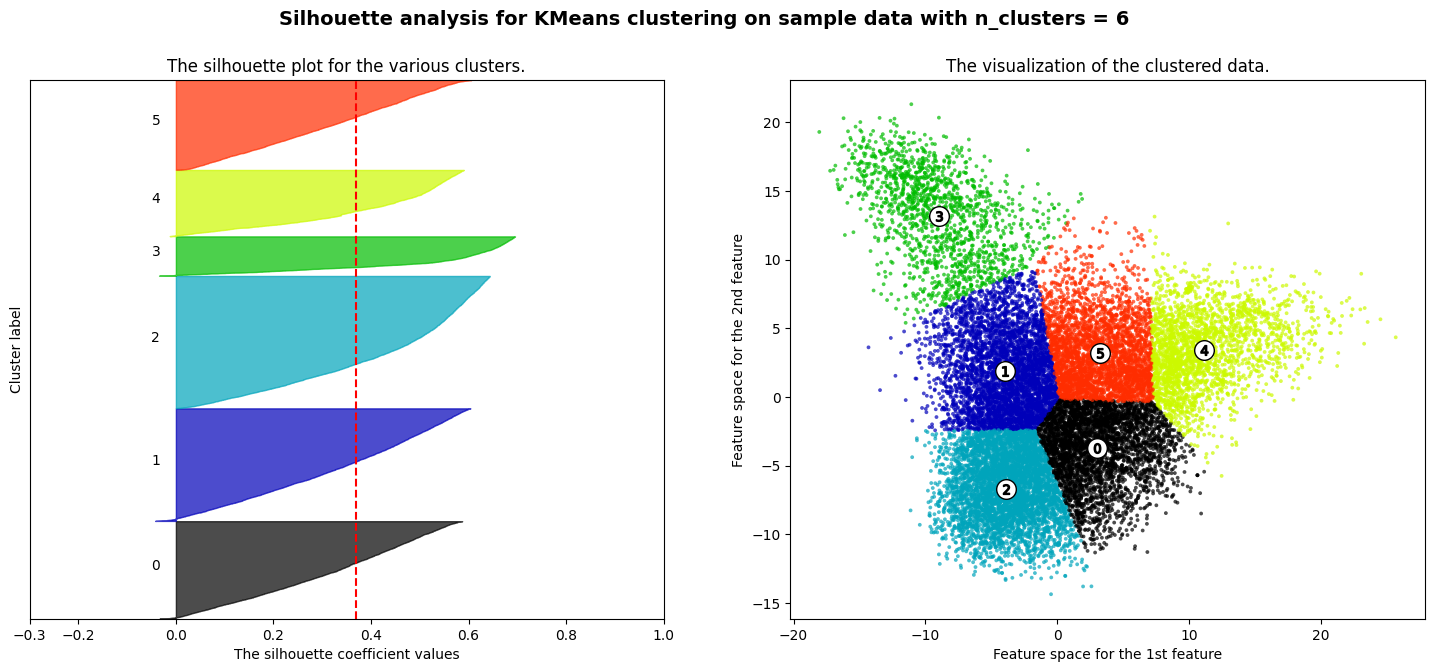

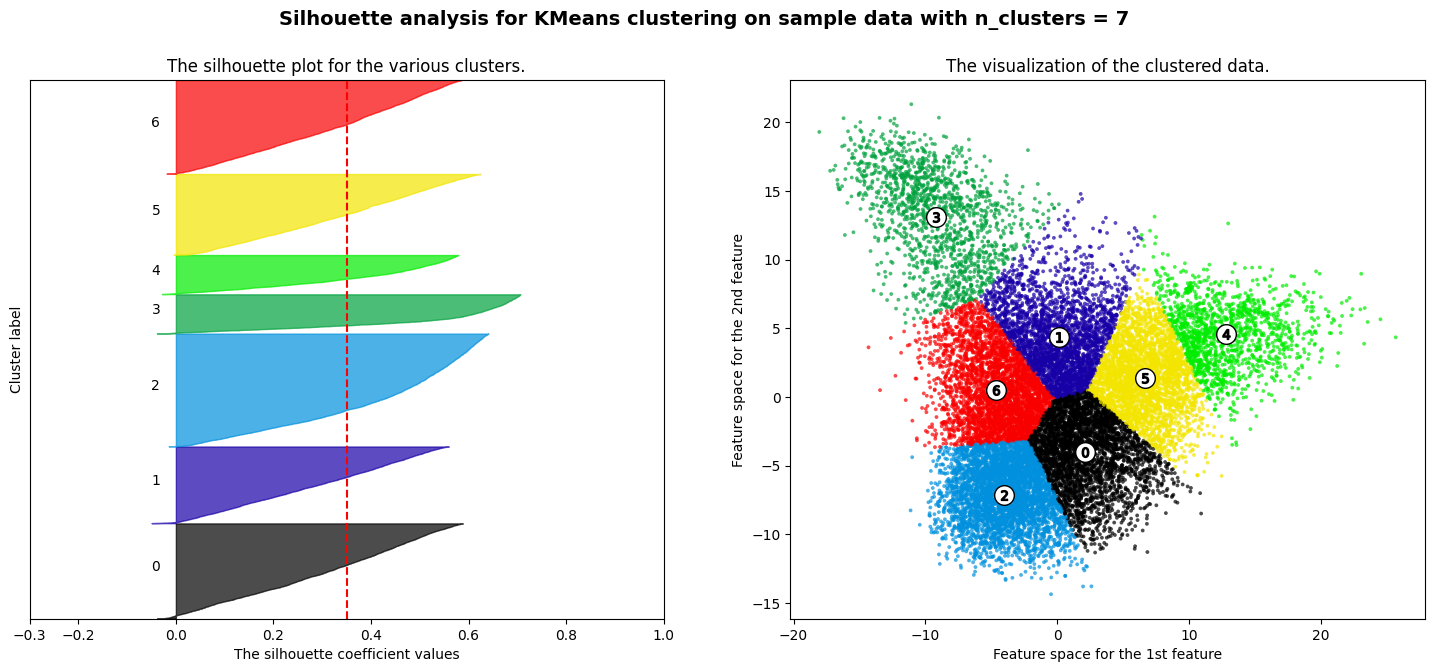

In [78]:
for n_clusters in clusters_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but only show in range [-0.3, 1] for simplicity
    ax1.set_xlim([-0.3, 1])
    # Insert gap space between silhouette
    gap = 10
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * gap])

    # Use Kmeans the fit the graph with number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculate the average silhouette_score for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}", f"The average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = gap
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i in order
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + gap 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Label and draw white circles at cluster centers
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

As shown above, the Silhouette analysis shows that it is mostly likely to have 3 cluster. However, the coefficients for other number of clusters are very close.  

In [100]:
length = []
for i in range(len(url_dataset)):
    length.append(len(url_dataset['contents'][i]))
max(length), min(length)

(500, 53)

### LDA on texts, find out topics in all documents 

In [165]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [197]:
docs = np.array([doc for doc in text_column])

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(docs)
label_list = []
doc_topic_dist_list = []
topic_word_dist_list = []

In [198]:
for n_clusters in clusters_range[:3]:
    lda = LatentDirichletAllocation(n_components=n_clusters, random_state=0)
    
    doc_topic_distribution = lda.fit_transform(X)
    doc_topic_dist_list.append(doc_topic_distribution)
    
    label_list.append(np.argmax(doc_topic_distribution, axis=1))
    
    topic_word_distribution = lda.components_
    topic_word_dist_list.append(topic_word_distribution)
    
    words = vectorizer.get_feature_names_out()
    print(f"For n_clusters = {n_clusters}: ")
    for topic_idx, topic in enumerate(topic_word_distribution):
        print(f"Topic #{topic_idx + 1}:", end='  ')
        print(" ".join([words[i] for i in topic.argsort()[:-11:-1]]))
    print('------------------------------------------------------------------')

For n_clusters = 2: 
Topic #1:  news new best 2022 com free page game people know
Topic #2:  recipe best easy make food com free 2022 recipes chicken
------------------------------------------------------------------
For n_clusters = 3: 
Topic #1:  best 2022 news game tv download free new guide android
Topic #2:  recipe easy make food best recipes chicken simple free use
Topic #3:  new com news 2022 page year april weather years people
------------------------------------------------------------------
For n_clusters = 4: 
Topic #1:  best 2022 news tv new game things com guide reviews
Topic #2:  free download com game best photos 2022 travel android video
Topic #3:  new news com 2022 year best free page april state
Topic #4:  recipe make food easy best recipes chicken free day like
------------------------------------------------------------------


100%|██████████| 20362/20362 [04:29<00:00, 75.51it/s] 


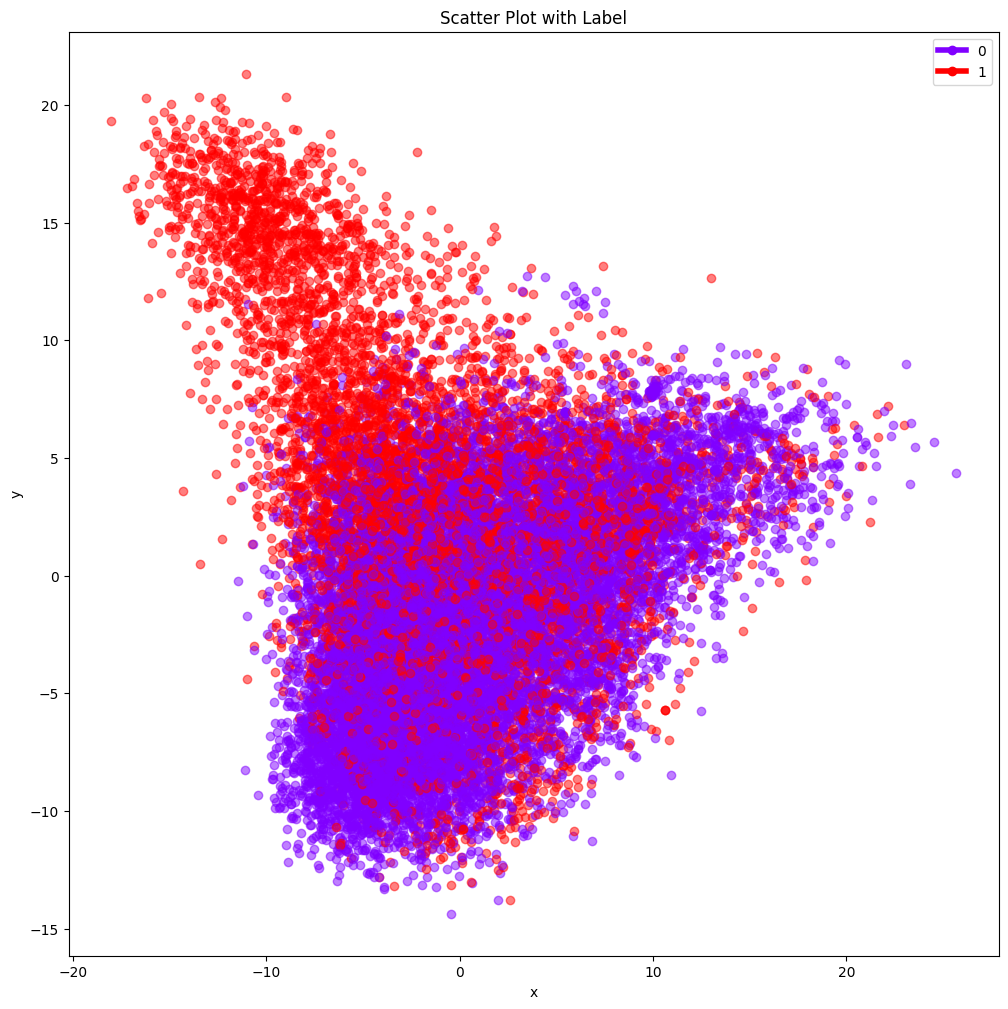

100%|██████████| 20362/20362 [04:32<00:00, 74.62it/s] 


100%|██████████| 20362/20362 [04:20<00:00, 78.11it/s] 


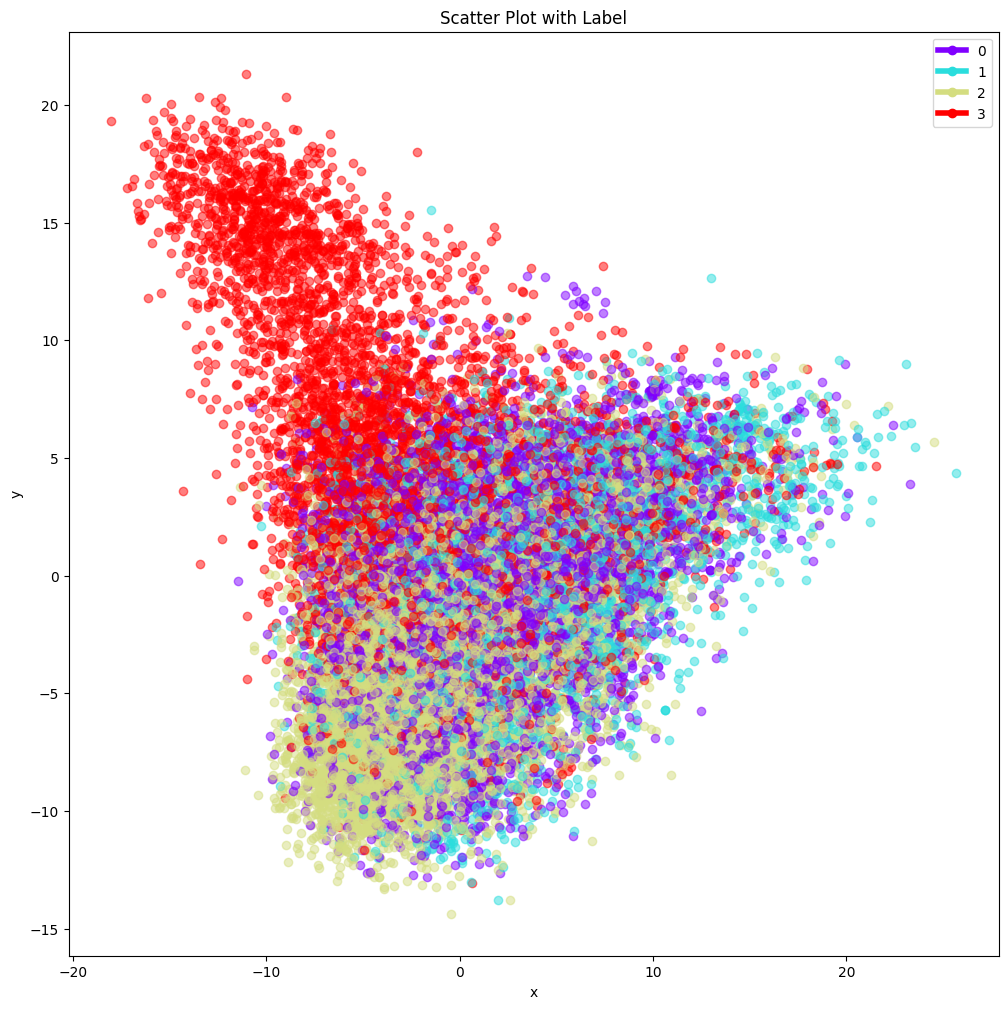

In [191]:
for labels in label_list:
    plt.figure(figsize=(12, 12))
    unique_labels = set(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    label_to_color = {label: color for label, color in zip(unique_labels, colors)}
    
    for i in tqdm.tqdm(range(len(url_dataset))):
        plt.scatter(x[i], y[i], color=label_to_color[labels[i]], alpha=0.5)
        
    # Create a custom legend
    legend_labels = [plt.Line2D([0], [0], color=color, lw=4, marker='o') for color in colors]
    plt.legend(legend_labels, unique_labels)
    
    plt.title(f'Scatter Plot with {len(unique_labels)} clusters')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()

As shown in the plots, it turns out that the scatter graph is more clear and distinct when there are 3 clusters. 

In [199]:
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(topic_word_dist_list[1]):
    print(f"Topic #{topic_idx + 1}:", end='  ')
    print(" ".join([words[i] for i in topic.argsort()[:-21:-1]]))
print('------------------------------------------------------------------')

Topic #1:  best 2022 news game tv download free new guide android things com latest reviews games world know home 10 online
Topic #2:  recipe easy make food best recipes chicken simple free use com delicious perfect cake single photos 2022 video healthy place
Topic #3:  new com news 2022 page year april weather years people free best used state car time university day online business
------------------------------------------------------------------


Overall, the most frequent words are "new", news", ".com" and "2022". It would be plausible to guess that the majority of the texts are about online advertisements in 2022.

Suspected themes/keywords for each topic: 
- Topic #1: Video Games, TVs, Online tools/softwares -- Digital Entertainment & Applications
- Topic #2: Food, Recipe, Health -- Food & Diet 
- Topic #3: Weather, University, Business -- Life & Society 